# Proyecto 1 - NLP

## Revision de ___ en comentarios de libros 

#### Importación de librerias

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

from wordcloud import WordCloud, STOPWORDS

#Librerias para sampling
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

#Librerias para vectorizacion
from sklearn.feature_extraction.text import TfidfVectorizer

#### Importación de datos

In [2]:
data = pd. read_csv('data/reviews.csv')

#### Preparación e los datos

1. Se se paro la columna helpfull en dpos columnas. Las veces que se le dio helpfull postivo, y las veces totales que se le ha dado helpful

In [3]:
data['Helpful Total'] = data['helpful'].str.replace("[","")
data['Helpful Total'] = data['Helpful Total'].str.replace("]","")
separacion = data['Helpful Total'].str.split(",",expand=True)
data['Helpful Total']=separacion[1].astype(int)
data['Helpful Positivo']=separacion[0].astype(int)
data

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful Total,Helpful Positivo
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,0,0
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2,2
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2,2
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,1,1
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
982614,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600,2,2
982615,982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600,0,0
982616,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600,1,1
982617,982617,B00M13FNSS,"[0, 0]",5,When I say this was an excellent book please b...,"07 23, 2014",A1BQO66R6OLCCW,Nikey,Wow!!,1406073600,0,0


2. Se omiteron los regitso que no han sido calificados helpfull ninguna vezy se calculo la tasa de positividad

In [4]:
# Filtar los reviws que no han sido clasificados como helpful
data = data[data["Helpful Total"] >0 ]
data['Helpful Rate'] = data['Helpful Positivo']/data['Helpful Total']
data.head()

<ipython-input-4-44ad27246076>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Helpful Rate'] = data['Helpful Positivo']/data['Helpful Total']


,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful Total,Helpful Positivo,Helpful Rate
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2,2,1.0
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2,2,1.0
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,1,1,1.0
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,1,0,0.0
7,7,B000F83SZQ,"[1, 1]",4,Never heard of Amy Brewster. But I don't need ...,"03 22, 2014",A3DE6XGZ2EPADS,WPY,Enjoyable reading and reminding the old times,1395446400,1,1,1.0


#### Análisis de los datos

 Distribución de la tasa de postividad en helpfull

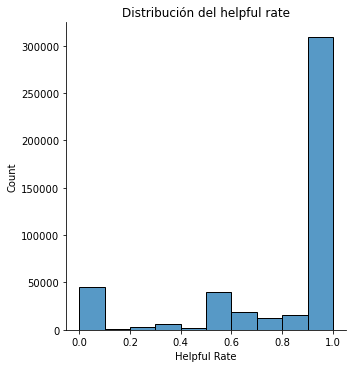

In [5]:
sns.displot(data["Helpful Rate"],bins = 10).set(title="Distribución del helpful rate");

#### Definición  de la vriable de salida

<ipython-input-10-7430b915376c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Output"] = np.where(data["Helpful Rate"] >= 0.9,1, 0)


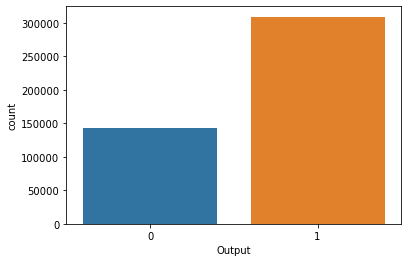

In [10]:
data["Output"] = np.where(data["Helpful Rate"] >= 0.9,1, 0)
sns.countplot(x="Output", data=data);

#### Dataframe NLP 

In [145]:
df = data[["Output", "reviewText"]]
df = df.reset_index()
df = df.drop(columns=["index"])
df = df.dropna()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Procesamiento de datos

In [ ]:
import string
import emoji
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import en_core_web_sm
import unidecode
import unicodedata

In [ ]:
# Puntucacion
punctuations = string.punctuation
# Carga los modelos de spacy y las stopwords
parser = en_core_web_sm.load()
stop_words = STOP_WORDS

In [ ]:
def clean_text(text):
    # Elimina espacios, emojis, números y convierte todo a minúscula.
    text = str(text)
    text = text.replace('\n','').replace('\r','').replace('\t','').strip().lower()
    text = re.sub(r'\d+', '', text)
    allchars = [str for str in text] 
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    text=''.join((c for c in unicodedata.normalize('NFD',text) if unicodedata.category(c) != 'Mn'))
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    # Tokenize
    token = parser(text)
    # Lemmatize
    token = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in token]
    # Quita stopwords y signos de puntuación
    token = ' '.join([word for word in token if word not in stop_words and word not in punctuations])
    token = unidecode.unidecode(token)
    token = ' '.join([w for w in token.split() if len(w)>1])
    return token

In [ ]:
df["CleanText"]=df["reviewText"].apply(clean_text)
df.head(10)

<AxesSubplot:xlabel='Output', ylabel='count'>

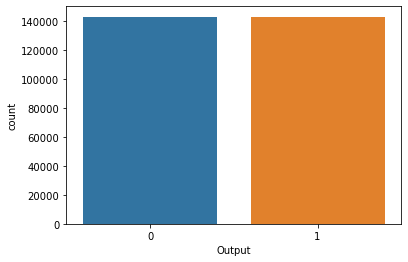

In [167]:
undersample = RandomUnderSampler(sampling_strategy='majority')
y = df['Output']
X = df['CleanText'].values.reshape(-1, 1) 
X_under, y_under = undersample.fit_resample(X, y)
sns.countplot(x=y_under)

In [182]:
balanced_df = pd.DataFrame()
balanced_df["Output"] =y_under
balanced_df["CleanText"] =X_under
balanced_df.to_csv("data/dataNLP.csv")

#### Exploración

In [ ]:
plt.figure(figsize=(14,7))
positive_text = ''.join(df[df['Output'] == 1].CleanText)
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 100, width=1366, height=768, background_color="white").generate(positive_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud de comentarios postivos',fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(14,7))
negative_text = ''.join(str(df[df['Output'] == 0].CleanText))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 100, width=1366, height=768, background_color="white").generate(negative_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud de comentarios negativos',fontsize=20)
plt.show()

#### Conversión a vectores

Importación del nuevo dataset. Solo se toman  50000 registros porque si no es muy pesado para crear lasm atrices y ajustar el modelo.  

In [183]:
df = pd.read_csv('data/dataNLP.csv', index_col=0)
df = df.dropna()
df.shape

(286254, 2)

In [192]:
sample_inex = sklearn.utils.random.sample_without_replacement(df.shape[0],100000)
sample = df.iloc[sample_inex,]
sample

,Output,CleanText
150809,1,anthology forever range story rate overall rat...
2286,0,starsthis book taboo series ok read good profe...
171973,1,holly north agree completely character account...
44524,0,prequel novella new series action junkie happy...
130416,0,good starter want try paleo diet recipe nice try
...,...,...
124955,0,book amazing read love werewolf book book great
35803,0,bible come edit haye duvall collection short p...
51088,0,gary william ad vicky knerly sudarium oviedo c...
89253,0,recently introduce brenda barrett novel thank ...


Se separa la muestra 90% train y 10% test

In [193]:
Y = sample["Output"]
X = sample["CleanText"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

Se codifican las matrices bajo el algoritmo TF_IDF. Solo se incluyen las ppalabras que están más de 50 veces en el dataframe para evitar palabras no significativas. 

In [194]:
tfidf_vectorizer = TfidfVectorizer(min_df = 250)

x_train_vect = tfidf_vectorizer.fit_transform(x_train).toarray()
x_test_vect = tfidf_vectorizer.transform(x_test).toarray()

In [195]:
x_train_vect.shape

(90000, 2052)

#### Modelo Random Forest con represntación TF - IDF 

Se crea un Pipeline con un modelo RanfomForest que se calibra por medio de  RandomSearchCV para encontrar los hiperparámetros que minimizan el error.

In [196]:
Pipeline_RF = Pipeline(steps = [("RF", RandomForestClassifier())])

Param_RF = {
    'RF__max_depth': np.linspace(1, 20, 20, endpoint=True),
    'RF__max_features': ['auto','log2','sqrt',None],
    'RF__min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),
    'RF__min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True)  
}

Grid_RF = RandomizedSearchCV(estimator = Pipeline_RF, param_distributions = Param_RF, scoring = 'accuracy', cv = 5, n_iter = 100, n_jobs = -1)

In [197]:
Grid_RF.fit(x_train_vect,y_train)
print('Mejores Parametros: %s' % Grid_RF.best_params_)
print('Mejor AUC en Train: %.3f' % Grid_RF.best_score_)

Mejores Parametros: {'RF__min_samples_split': 0.4, 'RF__min_samples_leaf': 0.1, 'RF__max_features': 'auto', 'RF__max_depth': 15.0}
Mejor AUC en Train: 0.556


##### Resulatados del modelo 

In [13]:
y_pred = Grid_RF.best_estimator_.predict(x_test_vect)
y_pred_proba = Grid_RF.best_estimator_.predict_proba(x_test_vect)[:,1]
print('La precisión del modelo Random Forest con TF- IDF  calibrado es:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('El AUC del modelo Random Forest con TF- IDF calibrado es:', '{:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

La precisión del modelo Random Forest con TF- IDF  calibrado es: 0.59
El AUC del modelo Random Forest con TF- IDF calibrado es: 0.50


####  Modelo 2

In [ ]:
Pipeline_KNN = Pipeline(steps = [("knn", KNeighborsClassifier())])

Param_KNN = {
    'knn__n_neighbors': [2,3,5,7,10,15,20,25,30,35],
    'knn__weights': ['uniform','distance'],
    'knn__algorithm':["ball_tree", "kd_tree", "brute"]
}

Grid_KNN = RandomizedSearchCV(estimator = Pipeline_KNN, param_distributions = Param_KNN, scoring = 'accuracy', cv = 5, n_iter = 100, n_jobs = -1)

In [ ]:
Grid_KNN.fit(x_train_vect,y_train)
print('Mejores Parametros: %s' % Grid_KNN.best_params_)
print('Mejor AUC en Train: %.3f' % Grid_KNN.best_score_)

In [ ]:
y_pred = Grid_KNN.best_estimator_.predict(x_test_vect)
y_pred_proba = Grid_KNN.best_estimator_.predict_proba(x_test_vect)[:,1]
print('La precisión del modelo Random Forest con TF- IDF  calibrado es:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('El AUC del modelo Random Forest con TF- IDF calibrado es:', '{:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

####  Modelo 3 

In [ ]:
#Intento de red 
sentences = [row.split() for row in sample['CleanText']]

In [ ]:
from gensim.models import Word2Vec
import multiprocessing
cores = multiprocessing.cpu_count()
we = Word2Vec(min_count = 20, window = 2, vector_size = 50, sample = 6e-5, alpha = 0.03, min_alpha = 0.0007, negative = 20, workers = cores-1)

In [ ]:
we.build_vocab(sentences, progress_per = 10000)

In [ ]:
we.train(sentences, total_examples = we.corpus_count, epochs = 30)

In [ ]:
we.wv.most_similar(["good"])

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [ ]:
tokenizer = Tokenizer(oov_token = '<UNK>')
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1 
max_length = 50
embedding_dim = 300

In [ ]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i > vocab_size:
        continue
    if word in we:
        embedding_matrix[i] = we[word]

In [ ]:
x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

x_train_pad = pad_sequences(x_train_tokens, maxlen = max_length, padding = 'post')
x_test_pad = pad_sequences(x_test_tokens, maxlen = max_length, padding = 'post')

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights = [embedding_matrix], input_length = max_length, trainable = False))
model.add(LSTM(units = 128, dropout = 0.1, recurrent_dropout = 0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.0001), metrics = ['accuracy'])
model.summary()